In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

In [35]:
date_cols = [
    'Auftragseingang', 
    'Auftragsende_SOLL',
    'AFO_Start_SOLL',
    'AFO_Ende_SOLL',
    'AFO_Start_IST',
    'AFO_Ende_IST'
]

data = pd.read_csv(
    '../data/processed/data_feature_3.csv',
    parse_dates=date_cols,
    sep=',',
    low_memory=False
)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   AuftragsID                  1528238 non-null  object        
 1   BauteilID                   1528238 non-null  int64         
 2   Bauteilbezeichnung          1528238 non-null  object        
 3   Auftragseingang             1528238 non-null  datetime64[ns]
 4   Priorität                   1528238 non-null  int64         
 5   Auftragsende_SOLL           1528238 non-null  datetime64[ns]
 6   Arbeitsschritt              1528238 non-null  int64         
 7   Arbeitsschrittbezeichnung   1528238 non-null  object        
 8   AFO_Start_SOLL              1528238 non-null  datetime64[ns]
 9   AFO_Ende_SOLL               1528238 non-null  datetime64[ns]
 10  AFO_Start_IST               1528238 non-null  datetime64[ns]
 11  AFO_Ende_IST            

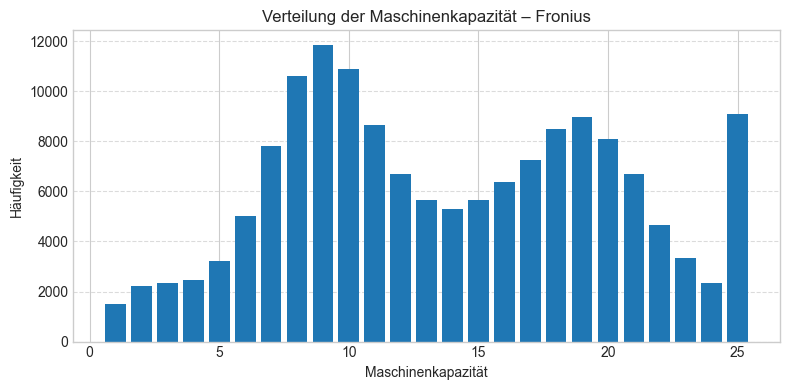

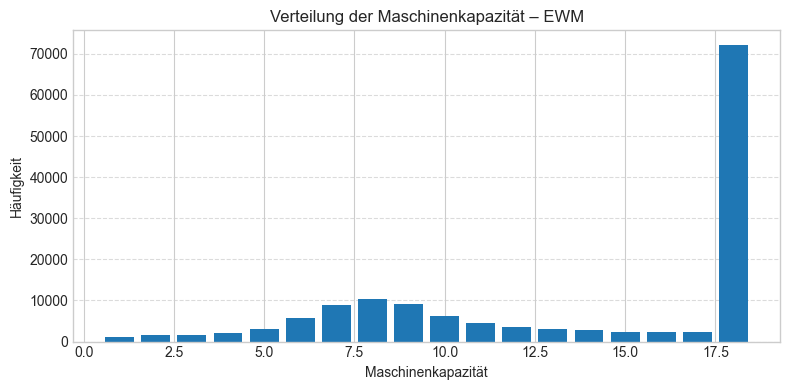

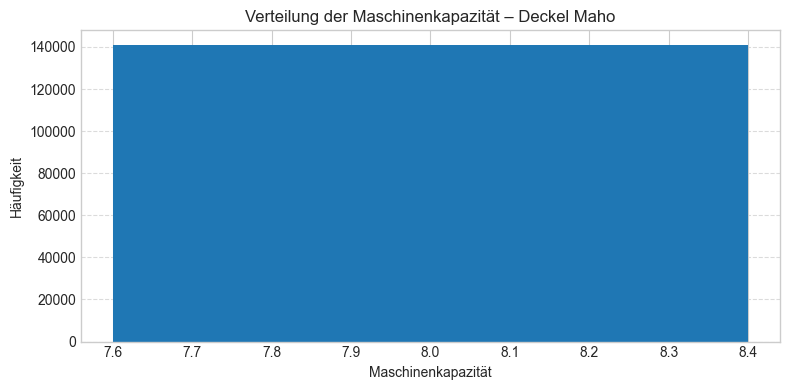

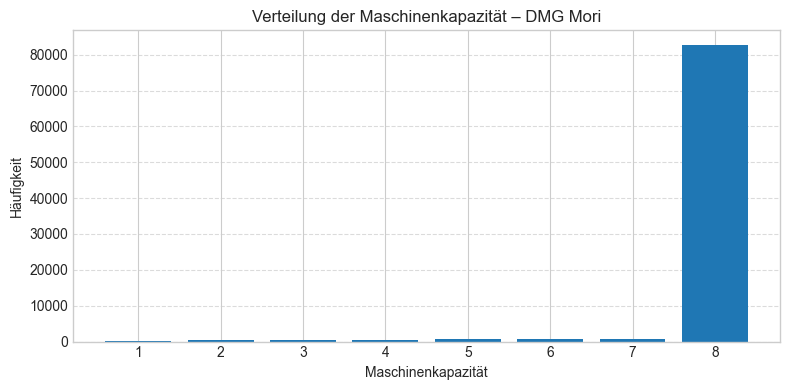

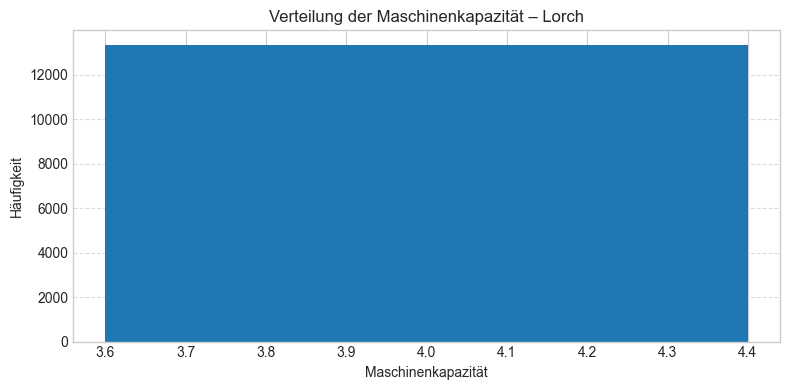

In [37]:
# Liste der Maschinen, die du analysieren willst
maschinen = ["Fronius", "EWM", "Deckel Maho", "DMG Mori", "Lorch"]

# Für jede Maschine ein Plot
for maschine in maschinen:
    subset = data[data["Maschinenbezeichnung"] == maschine]
    
    # Gruppieren nach Maschinenkapazität und zählen
    counts = subset["Maschinenkapazität"].value_counts().sort_index()
    
    plt.figure(figsize=(8,4))
    plt.bar(counts.index, counts.values)
    plt.title(f"Verteilung der Maschinenkapazität – {maschine}")
    plt.xlabel("Maschinenkapazität")
    plt.ylabel("Häufigkeit")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

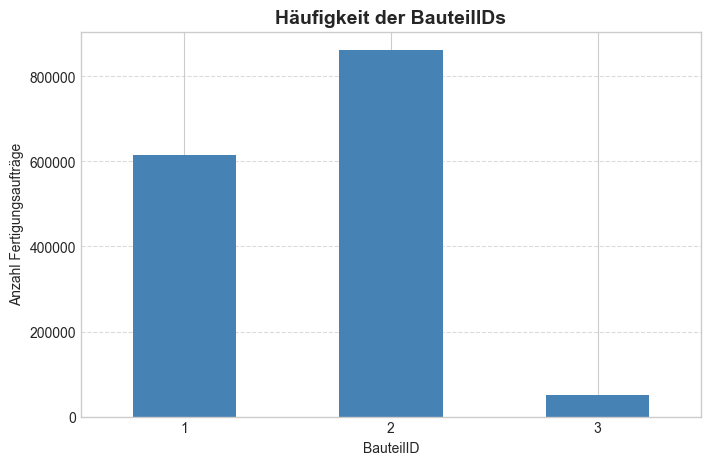

In [38]:
plt.figure(figsize=(8,5))
data['BauteilID'].value_counts().sort_index().plot(kind='bar', color='steelblue')

plt.title('Häufigkeit der BauteilIDs', fontsize=14, fontweight='bold')
plt.xlabel('BauteilID')
plt.ylabel('Anzahl Fertigungsaufträge')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
data['AuftragsID'].describe()
# AuftragsID kommt öfters die selbe vor 

count                              1528238
unique                              156354
top       80dbf0927b274ab88b36073b0a45a3e6
freq                                    11
Name: AuftragsID, dtype: object

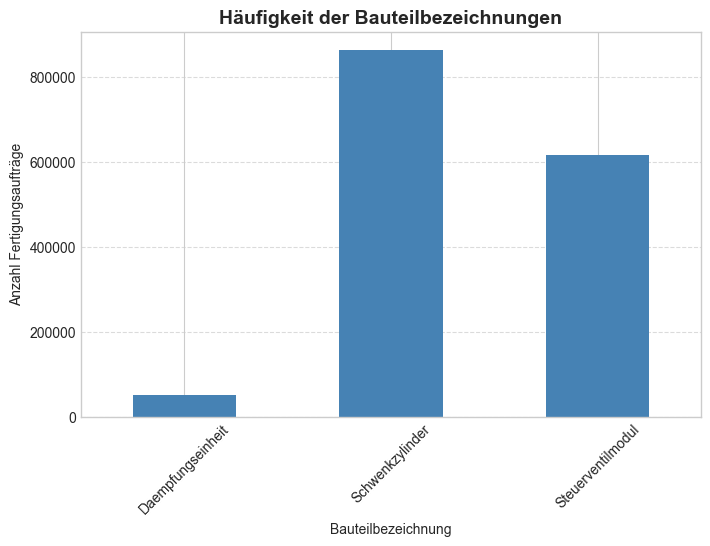

In [40]:
plt.figure(figsize=(8,5))
data['Bauteilbezeichnung'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Häufigkeit der Bauteilbezeichnungen', fontsize=14, fontweight='bold')
plt.xlabel('Bauteilbezeichnung')
plt.ylabel('Anzahl Fertigungsaufträge')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_207/135262424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Arbeitsschritt", data=data, palette="viridis")


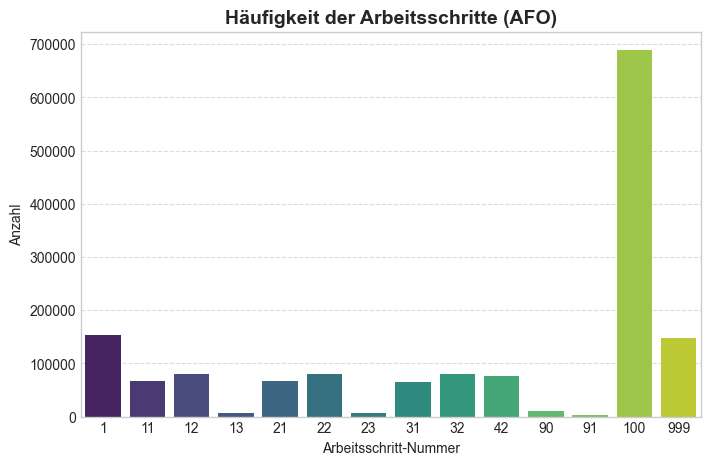

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(x="Arbeitsschritt", data=data, palette="viridis")
plt.title("Häufigkeit der Arbeitsschritte (AFO)", fontsize=14, fontweight='bold')
plt.xlabel("Arbeitsschritt-Nummer")
plt.ylabel("Anzahl")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_207/1396387498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labels.values, y=top_labels.index, palette="coolwarm")


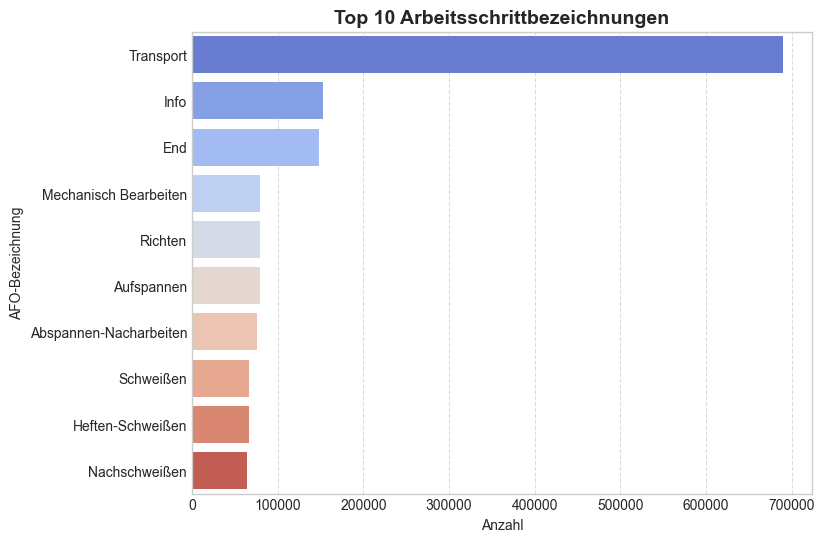

In [42]:
plt.figure(figsize=(8,6))
top_labels = data["Arbeitsschrittbezeichnung"].value_counts().nlargest(10)
sns.barplot(x=top_labels.values, y=top_labels.index, palette="coolwarm")
plt.title("Top 10 Arbeitsschrittbezeichnungen", fontsize=14, fontweight='bold')
plt.xlabel("Anzahl")
plt.ylabel("AFO-Bezeichnung")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


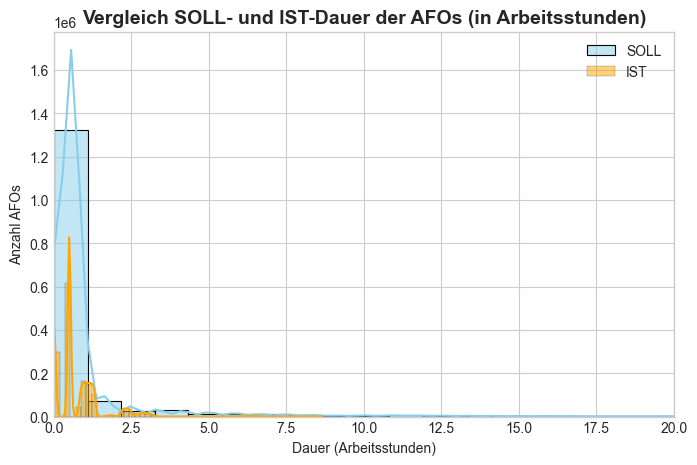

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(data["AFO_Dauer_SOLL_Stunden"], bins=50, color="skyblue", label="SOLL", kde=True)
sns.histplot(data["AFO_Dauer_IST_Stunden"], bins=50, color="orange", label="IST", kde=True)
plt.title("Vergleich SOLL- und IST-Dauer der AFOs (in Arbeitsstunden)", fontsize=14, fontweight='bold')
plt.xlabel("Dauer (Arbeitsstunden)")
plt.ylabel("Anzahl AFOs")
plt.legend()
plt.xlim(0, 20)
plt.show()

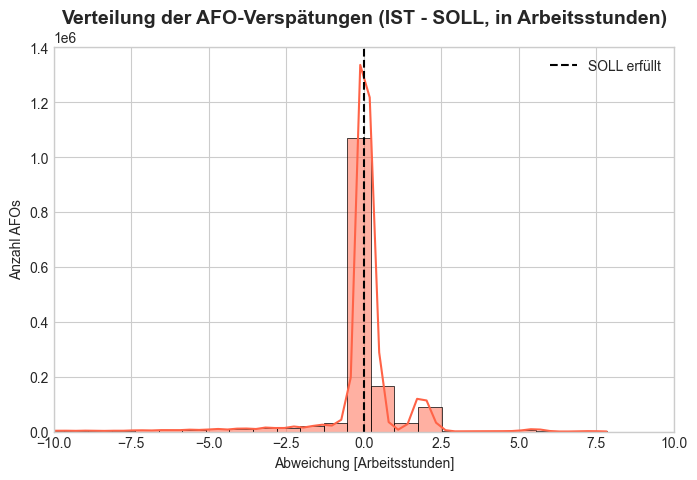

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(data["AFO_Verspätung_Arbeitszeit"], bins=80, color="tomato", kde=True)
plt.title("Verteilung der AFO-Verspätungen (IST - SOLL, in Arbeitsstunden)", fontsize=14, fontweight='bold')
plt.xlabel("Abweichung [Arbeitsstunden]")
plt.ylabel("Anzahl AFOs")
plt.axvline(0, color="black", linestyle="--", label="SOLL erfüllt")
plt.legend()
plt.xlim(-10, 10)
plt.show()


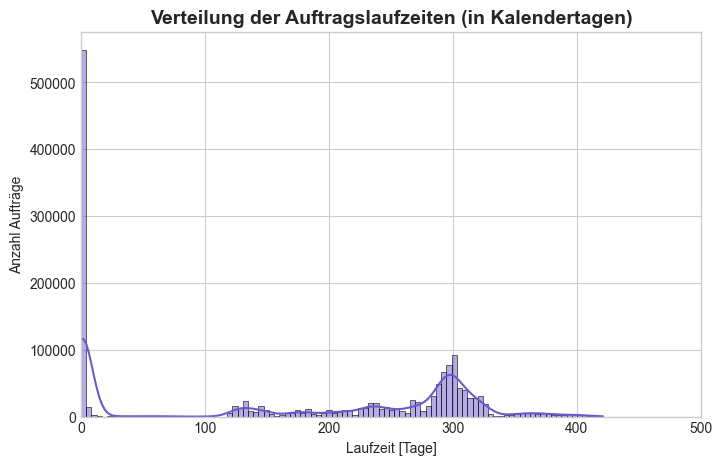

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(data["Auftrags_Laufzeit_IST_Tage"], bins=100, color="slateblue", kde=True)
plt.title("Verteilung der Auftragslaufzeiten (in Kalendertagen)", fontsize=14, fontweight='bold')
plt.xlabel("Laufzeit [Tage]")
plt.ylabel("Anzahl Aufträge")
plt.xlim(0, 500)
plt.show()


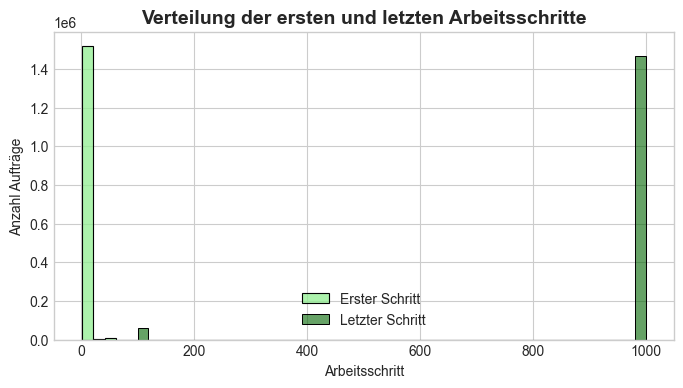

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(data["AFO_Erster_Schritt"], bins=50, color="lightgreen", label="Erster Schritt")
sns.histplot(data["AFO_Letzter_Schritt"], bins=50, color="darkgreen", label="Letzter Schritt", alpha=0.6)
plt.title("Verteilung der ersten und letzten Arbeitsschritte", fontsize=14, fontweight='bold')
plt.xlabel("Arbeitsschritt")
plt.ylabel("Anzahl Aufträge")
plt.legend()
plt.show()


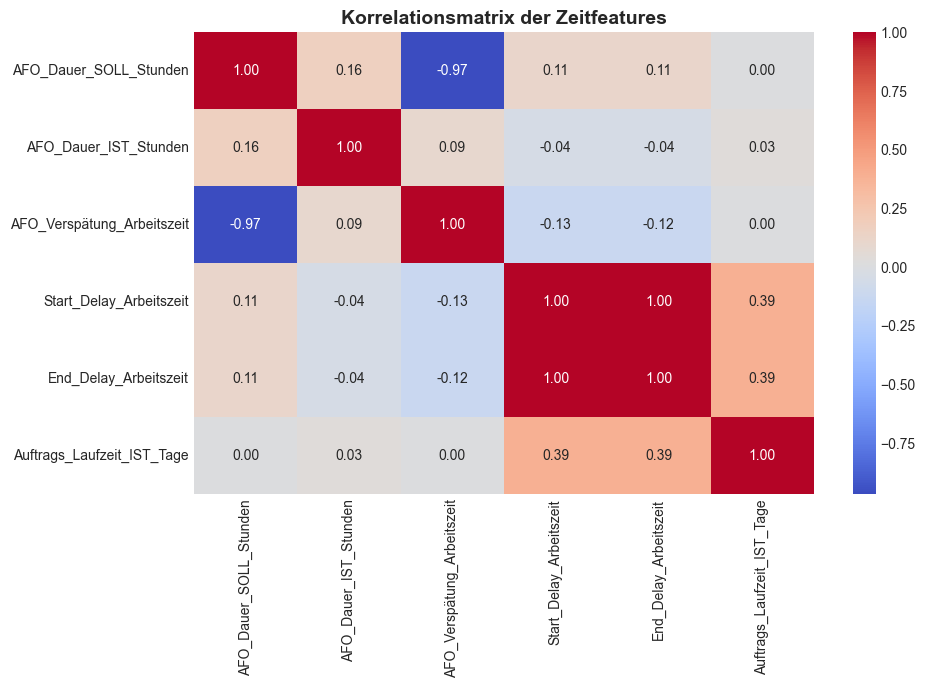

In [49]:
plt.figure(figsize=(10,6))
corr = data[[
    "AFO_Dauer_SOLL_Stunden",
    "AFO_Dauer_IST_Stunden",
    "AFO_Verspätung_Arbeitszeit",
    "Start_Delay_Arbeitszeit",
    "End_Delay_Arbeitszeit",
    "Auftrags_Laufzeit_IST_Tage"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix der Zeitfeatures", fontsize=14, fontweight='bold')
plt.show()
